In [436]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.simplefilter(action='ignore')

## Limpeza e tratamento dos Dados

In [437]:
# Carregar o conjunto de dados de Doença Cardíaca do repositório UCI
heart_disease = fetch_ucirepo(id=45)

# Extração das features e do target
X = heart_disease.data.features  
y = heart_disease.data.targets  

# Criar um DataFrame combinando as features e target
df = pd.concat([X, y], axis=1)  

# Criando um df com variaveis que vao continuar numericas
df_num = df.copy()

df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


### Mapeando para criar algumas variáveis categóricas

In [439]:
df['sex'] = df['sex'].map({1: 'masculino', 0: 'feminino'})

df['cp'] = df['cp'].map({
    1: 'Angina Típica', 
    2: 'Angina Atípica', 
    3: 'Outro tipo de dor', 
    4: 'Assintomático'
})

df['fbs'] = df['fbs'].map({0: '≤ 120', 1: '> 120'})

df['restecg'] = df['restecg'].map({
    0: 'Normal', 
    1: 'Anomalia da onda ST-T (inversões da onda T e/ou elevação ou depressão do ST > 0.05 mV)', 
    2: 'Mostrando hipertrofia ventricular esquerda provável ou definitiva segundo os critérios de Estes'
})

df['slope'] = df['slope'].map({
    1: 'Ascendente', 
    2: 'Plano', 
    3: 'Descendente'
})

df['thal'] = df['thal'].map({
    3: 'Normal', 
    6: 'Defeito fixo detectado', 
    7: 'Defeito reversível'
})

df['num'] = df['num'].replace([1, 2, 3, 4], ['Doença leve', 'Doença moderada', 'Doença severa', 'Doença muito severa'])

df['num'] = df['num'].replace(0, 'Sem Doença')


### Definindo threshold para chol e age

In [440]:
bins = [0, 200,float('inf')]
labels = ['Normal', 'Alto']  

df['chol'] = pd.cut(df['chol'], bins=bins, labels=labels)

In [441]:
bins = [30, 45, 60, 80]
labels = ['30-45', '45-60', '60-80']

df['age_bins'] = pd.cut(df['age'], bins=bins, labels=labels)

### Renomeando colunas

In [442]:
df.rename(columns={
    'cp': 'chest pain',
    'trestbps': 'rest blood pressure',
    'chol': 'cholesterol',
    'fbs': 'glucose',
    'restecg': 'rest ecg',
    'thalach': 'max hr',
    'exang': 'exercise induced angina',
    'oldpeak': 'ST depression',
    'slope': 'ST inclination',
    'ca': 'number of major vessels ',
    'thal': 'thalassemia',
    'num': 'desease'
}, inplace=True)

### Removendo linhas com na

In [443]:
df.dropna(inplace=True)

### Criando um dataset de pacientes doentes e um de não doentes

In [446]:
df_hdes = df[df['desease'] != 'Sem Doença']
df_hok = df[df['desease'] == 'Sem Doença']

df_num_hdes = df_num[df_num['num'] != 0]

## Gráfico 1

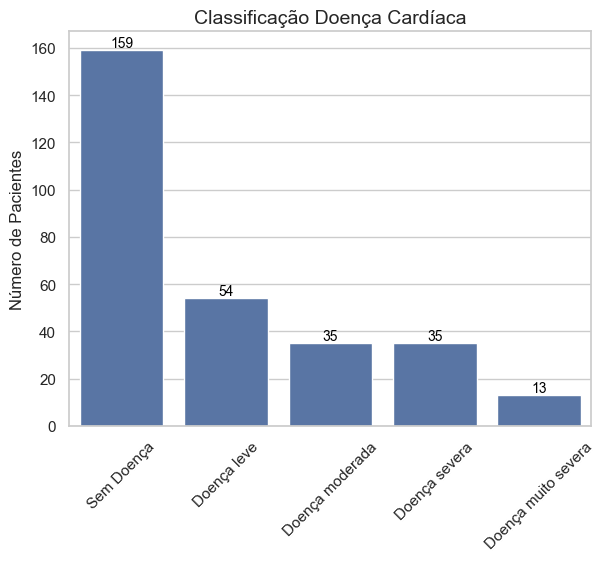

In [460]:
desease_counts = df['desease'].value_counts().reset_index()
desease_counts.columns = ['desease', 'count']

desease_counts = desease_counts[desease_counts['count'] > 0]

ax = sns.barplot(x='desease', y='count', data=desease_counts)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',  
                fontsize=10, color='black',
                xytext=(0, 5),
                textcoords='offset points')

plt.title("Classificação Doença Cardíaca", fontsize=14)
plt.ylabel("Número de Pacientes", fontsize=12)
plt.xlabel("")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


## Gráfico 2

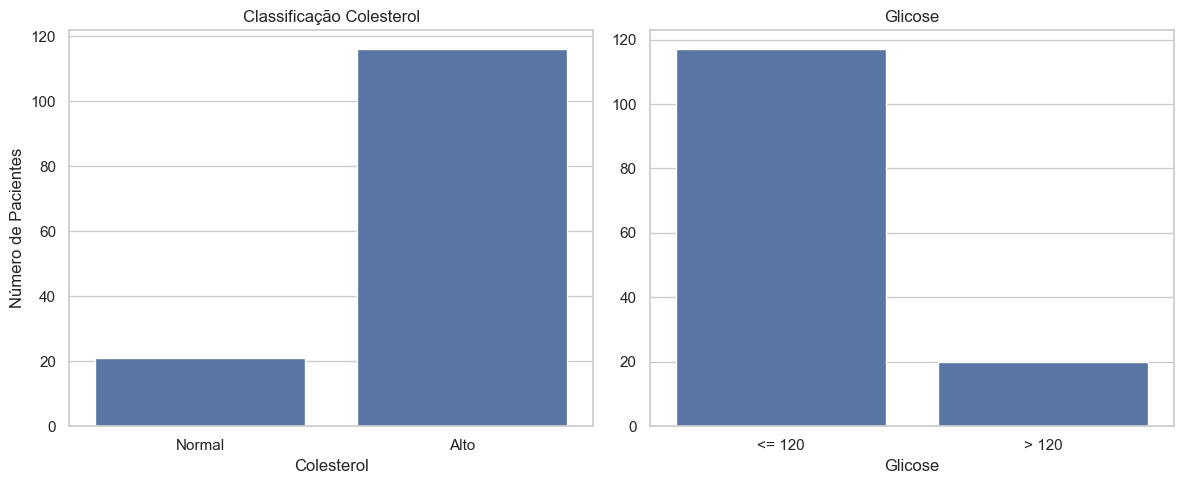

In [459]:
cholesterol_counts = df_hdes['cholesterol'].value_counts().reset_index()
cholesterol_counts.columns = ['cholesterol', 'count']

glucose_counts = df_hdes['glucose'].value_counts().reset_index()
glucose_counts.columns = ['glucose', 'count']

glucose_counts = glucose_counts[glucose_counts['count'] > 0]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Gráfico 1: Pressão Arterial vs Idade
sns.barplot(x='cholesterol', y='count', data=cholesterol_counts, ax=axes[0])
axes[0].set_xlabel('Colesterol')
axes[0].set_ylabel('Número de Pacientes')
axes[0].set_title('Classificação Colesterol')

# Gráfico 2: FC Máxima vs Idade
sns.barplot(x='glucose', y='count', data=glucose_counts, ax=axes[1])
axes[1].set_xlabel('Glicose')
axes[1].set_ylabel('')
axes[1].set_title('Glicose')

plt.tight_layout()
plt.show()


## Gráfico 3

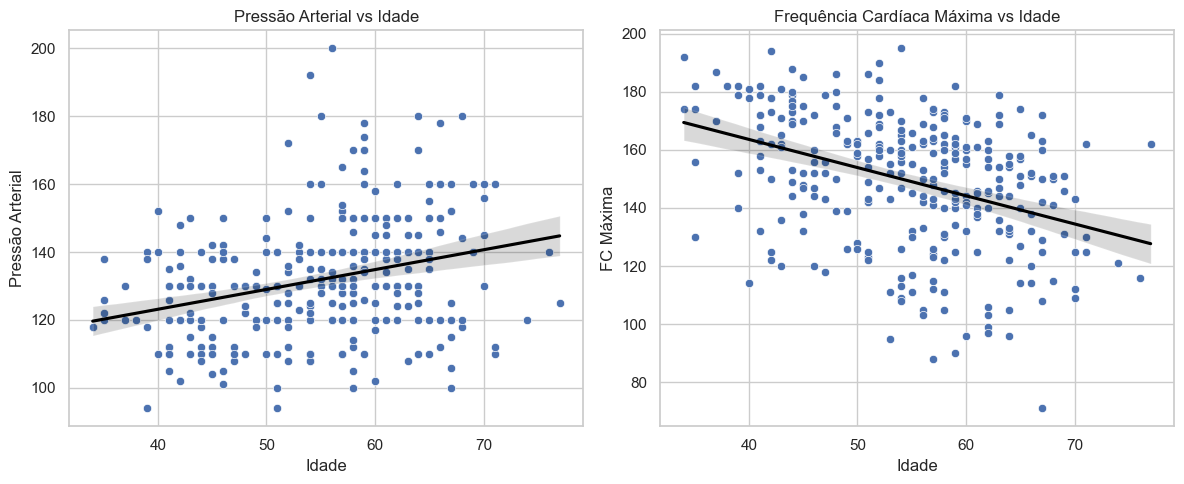

In [449]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x=df['age'], y=df['rest blood pressure'], ax=axes[0])
sns.regplot(x=df['age'], y=df['rest blood pressure'], scatter=False, color='black', ax=axes[0])
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Pressão Arterial')
axes[0].set_title('Pressão Arterial vs Idade')


sns.scatterplot(x=df['age'], y=df['max hr'], ax=axes[1])
sns.regplot(x=df['age'], y=df['max hr'], scatter=False, color='black', ax=axes[1])
axes[1].set_xlabel('Idade')
axes[1].set_ylabel('FC Máxima')
axes[1].set_title('Frequência Cardíaca Máxima vs Idade')

plt.tight_layout()
plt.show()

Tendencia de queda como é falado por especialistas / 220 - idade

## Gráfico 4

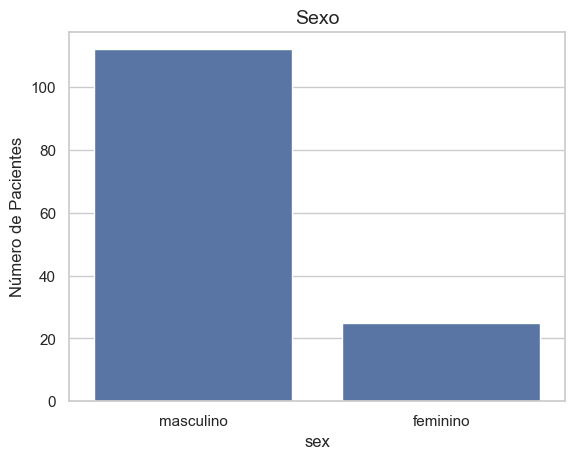

In [450]:
sex_counts = df_hdes['sex'].value_counts().reset_index()
sex_counts.columns = ['sex', 'count']

sex_counts = sex_counts[sex_counts['count'] > 0]

sns.barplot(x='sex', y='count', data=sex_counts)

plt.title("Sexo", fontsize=14)
plt.ylabel("Número de Pacientes", fontsize=12)
plt.show()

## Gráfico 5

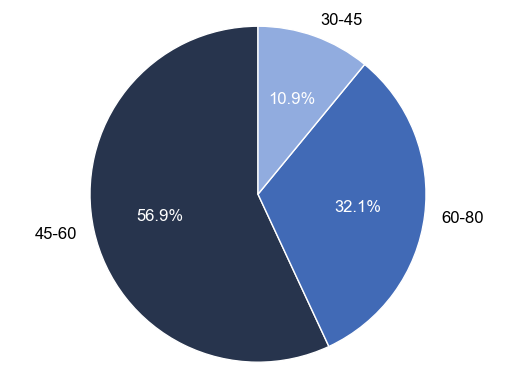

In [452]:

age_counts = df_hdes['age_bins'].value_counts()

plt.pie(
    age_counts,
    labels=age_counts.index,
    autopct=lambda p: f'{p:.1f}%',
    startangle=90,
    colors=['#27344D', '#416AB6', '#91ACDF'],
    textprops={'color': 'black', 'fontsize': 12}, 
)

for text in plt.gca().texts:
    if '%' in text.get_text():
        text.set_color('white')

plt.axis('equal')
plt.show()

## Gráfico 6

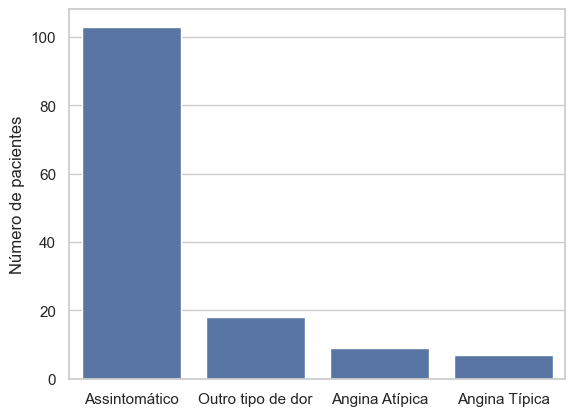

In [458]:
chest_pain_counts = df_hdes['chest pain'].value_counts().reset_index()
chest_pain_counts.columns = ['chest pain', 'count']

chest_pain_counts = chest_pain_counts[chest_pain_counts['count'] > 0]

sns.barplot(x='chest pain', y='count', data=chest_pain_counts)


plt.ylabel('Número de pacientes')
plt.xlabel('')
plt.show()

## Matriz de Correlação

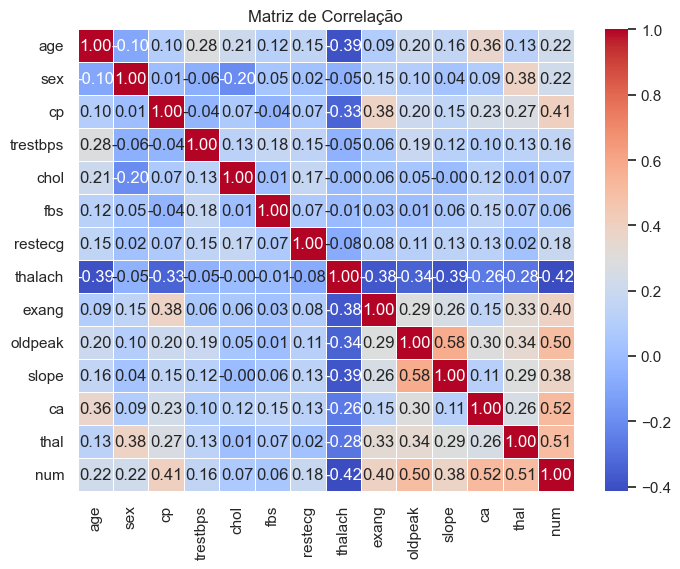

In [453]:
corr_matrix = df_num.corr()

plt.figure(figsize=(8, 6))  # Define o tamanho da figura
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Adicionar título
plt.title('Matriz de Correlação')

# Mostrar o gráfico
plt.show()

### Correlação Decrescente

In [455]:
correlation = corr_matrix['num'].sort_values(ascending=False)
correlation

num         1.000000
ca          0.518909
thal        0.509923
oldpeak     0.504092
cp          0.407075
exang       0.397057
slope       0.377957
sex         0.224469
age         0.222853
restecg     0.183696
trestbps    0.157754
chol        0.070909
fbs         0.059186
thalach    -0.415040
Name: num, dtype: float64